# Ejercicios con imágenes

## Generar imágenes


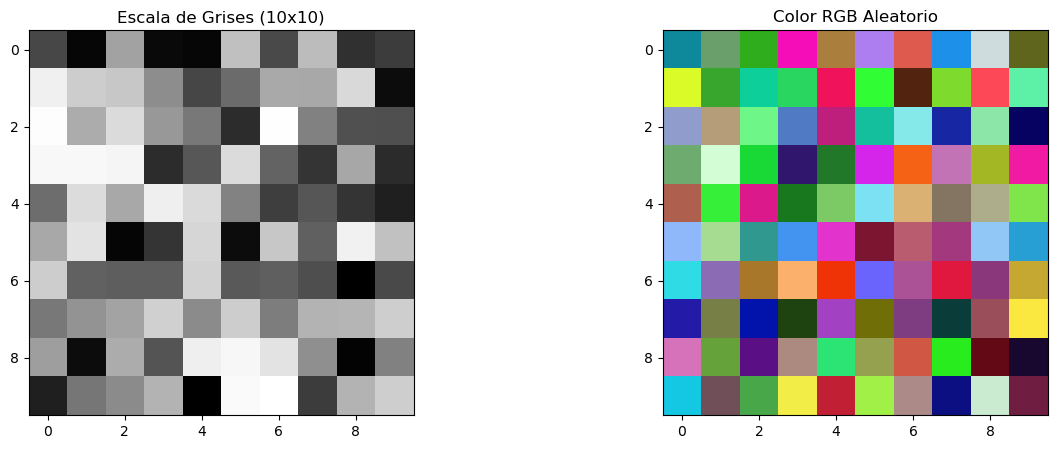

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. IMAGEN EN ESCALA DE GRISES (Matriz 2D)
# Creamos una matriz de 10x10 con valores aleatorios entre 0 y 255
gris = np.random.randint(0, 256, (10, 10))

# 2. IMAGEN A COLOR RGB (Matriz 3D)
# Una imagen de 10x10 píxeles, con 3 canales (R, G, B)
color = np.zeros((10, 10, 3), dtype=np.uint8)
color[:, :, 0] = np.random.randint(0, 256, (10, 10)) # Canal Rojo
color[:, :, 1] = np.random.randint(0, 256, (10, 10)) # Canal Verde
color[:, :, 2] = np.random.randint(0, 256, (10, 10)) # Canal Azul


# --- VISUALIZACIÓN ---
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Mostrar escala de grises
axs[0].imshow(gris, cmap='gray')
axs[0].set_title("Escala de Grises (10x10)")

# Mostrar color
axs[1].imshow(color)
axs[1].set_title("Color RGB Aleatorio")


plt.show()

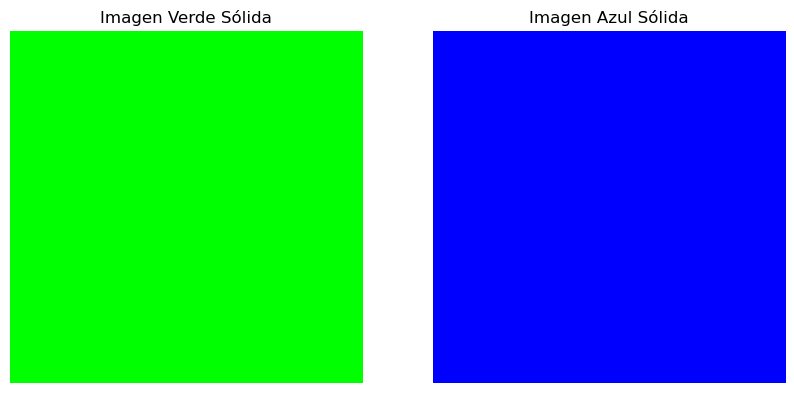

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos el tamaño de las imágenes (100x100 píxeles)
alto, ancho = 100, 100

# 1. Crear IMAGEN VERDE
# Inicializamos una matriz de ceros (negro) con 3 canales
imagen_verde = np.zeros((alto, ancho, 3), dtype=np.uint8)
# Asignamos 255 al canal G (índice 1)
imagen_verde[:, :, 1] = 255 

# 2. Crear IMAGEN AZUL
imagen_azul = np.zeros((alto, ancho, 3), dtype=np.uint8)
# Asignamos 255 al canal B (índice 2)
imagen_azul[:, :, 2] = 255

# --- VISUALIZACIÓN ---
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(imagen_verde)
axs[0].set_title("Imagen Verde Sólida")
axs[0].axis('off') # Ocultar ejes

axs[1].imshow(imagen_azul)
axs[1].set_title("Imagen Azul Sólida")
axs[1].axis('off')

plt.show()

## Cargar una imagen

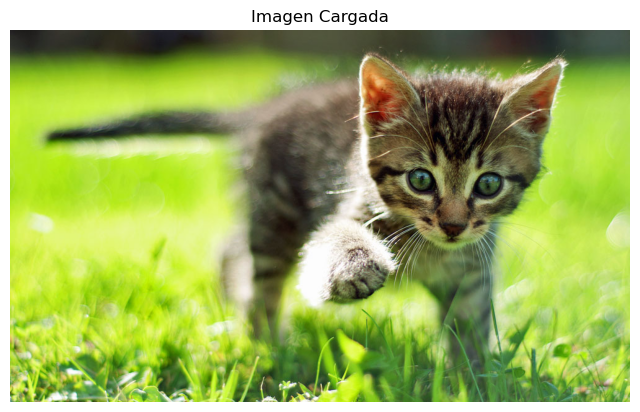

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 1. Cargar la imagen
# Reemplaza 'nombre_de_tu_imagen.jpg' por la ruta de tu archivo

ruta_archivo = "C:/Users/paul.rosero/Documents/UIDE/SEMANA_1/Clase/gato.jpg"
try:
    img = mpimg.imread(ruta_archivo) 
    
    # 2. Mostrar la imagen
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    
    # 3. Configurar la visualización
    plt.title("Imagen Cargada")
    plt.axis('off')  # Oculta los ejes (coordenadas de píxeles)
    plt.show()

except FileNotFoundError:
    print("Error: No se encontró el archivo de imagen. Asegúrate de que esté en la misma carpeta.")

## Operaciones geométricas con imágenes

Dimensiones: 1000px de ancho x 600px de alto
Formato: JPEG
Modo de color: RGB


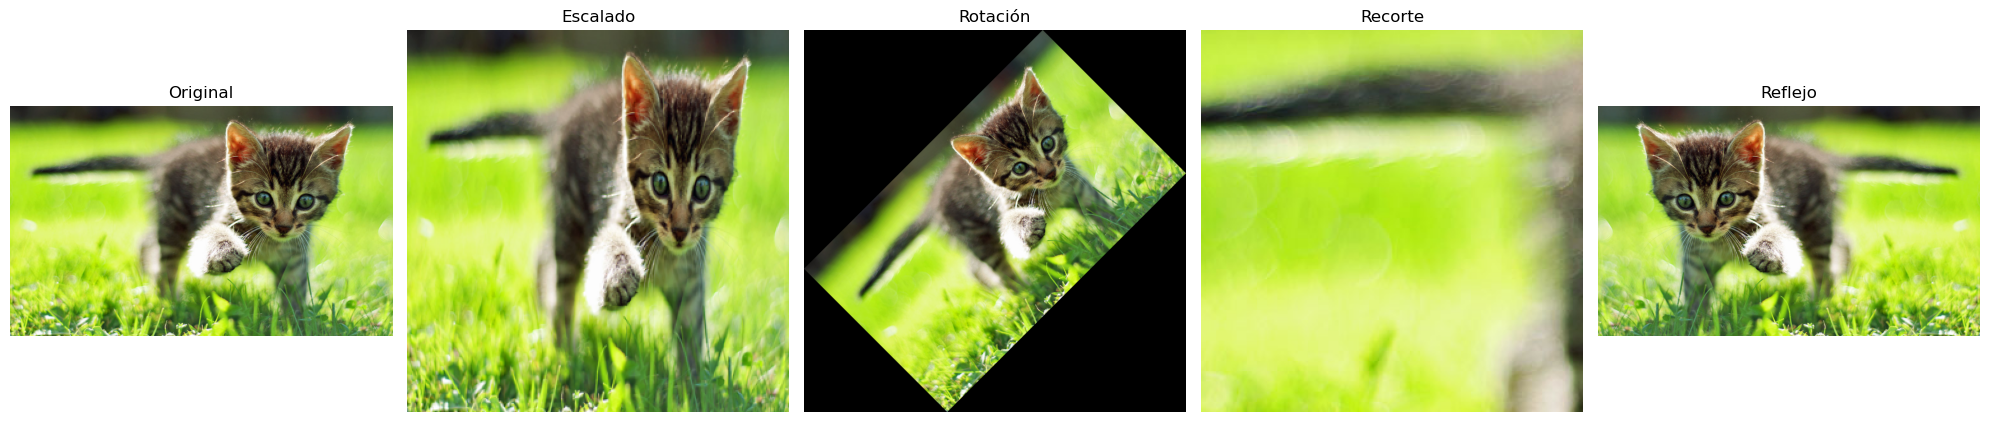

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

imagen = "C:/Users/paul.rosero/Documents/UIDE/SEMANA_1/Clase/gato.jpg"
# 1. Cargar la imagen
img = Image.open(imagen)

# Obtener información
ancho, alto = img.size
formato = img.format  # Ejemplo: 'JPEG', 'PNG'
modo = img.mode      # Ejemplo: 'RGB', 'RGBA', 'L' (escala de grises)

print(f"Dimensiones: {ancho}px de ancho x {alto}px de alto")
print(f"Formato: {formato}")
print(f"Modo de color: {modo}")

# A. ESCALADO (Resizing)
# Definimos el nuevo tamaño en una tupla (ancho, alto)
img_resizada = img.resize((300, 300))

# B. ROTACIÓN
# Girar 45 grados. 'expand=True' ajusta el lienzo para que no se corten las esquinas
img_rotada = img.rotate(45, expand=True)

# C. RECORTE (Cropping)
# Definimos la caja: (izquierda, superior, derecha, inferior)
caja = (100, 100, 400, 400)
img_recortada = img.crop(caja)

# D. REFLEJO (Flip)
# FLIP_LEFT_RIGHT para espejo horizontal, FLIP_TOP_BOTTOM para vertical
img_reflejada = img.transpose(Image.FLIP_LEFT_RIGHT)

# --- VISUALIZACIÓN ---
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

axs[0].imshow(img); axs[0].set_title("Original")
axs[1].imshow(img_resizada); axs[1].set_title("Escalado")
axs[2].imshow(img_rotada); axs[2].set_title("Rotación")
axs[3].imshow(img_recortada); axs[3].set_title("Recorte")
axs[4].imshow(img_reflejada); axs[4].set_title("Reflejo")

for ax in axs: ax.axis('off')
plt.tight_layout()
plt.show()

## Operaciones de punto

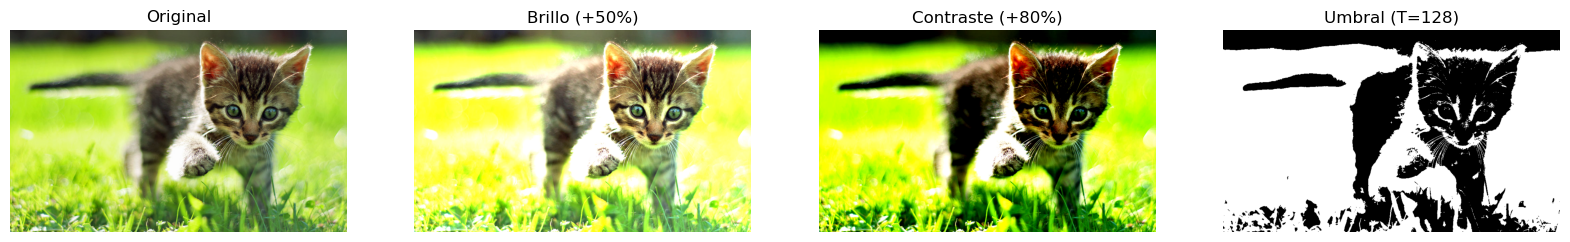

In [1]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

imagen = "C:/Users/paul.rosero/Documents/UIDE/SEMANA_1/Clase/gato.jpg"
# 1. Cargar la imagen
img = Image.open(imagen)

# --- OPERACIONES DE PUNTO ---

# A. Ajuste de Brillo
# 1.0 es original, < 1.0 oscurece, > 1.0 aclara
enhancer_brillo = ImageEnhance.Brightness(img)
img_brillo = enhancer_brillo.enhance(1.5) # Aumentar 50%

# B. Ajuste de Contraste
# 1.0 es original, < 1.0 reduce contraste, > 1.0 aumenta
enhancer_contraste = ImageEnhance.Contrast(img)
img_contraste = enhancer_contraste.enhance(1.8) # Aumentar contraste significativamente

# C. Umbralización (Thresholding)
# Primero convertimos a escala de grises ('L')
img_gris = img.convert('L')
umbral = 128
# Si el píxel es > umbral, ponemos 255 (blanco), si no 0 (negro)
img_umbral = img_gris.point(lambda p: 255 if p > umbral else 0, mode='1')

# --- VISUALIZACIÓN ---
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(img)
axs[0].set_title("Original")

axs[1].imshow(img_brillo)
axs[1].set_title("Brillo (+50%)")

axs[2].imshow(img_contraste)
axs[2].set_title("Contraste (+80%)")

axs[3].imshow(img_umbral, cmap='gray')
axs[3].set_title(f"Umbral (T={umbral})")

for ax in axs: ax.axis('off')
plt.show()

## Operaciones de vecindad

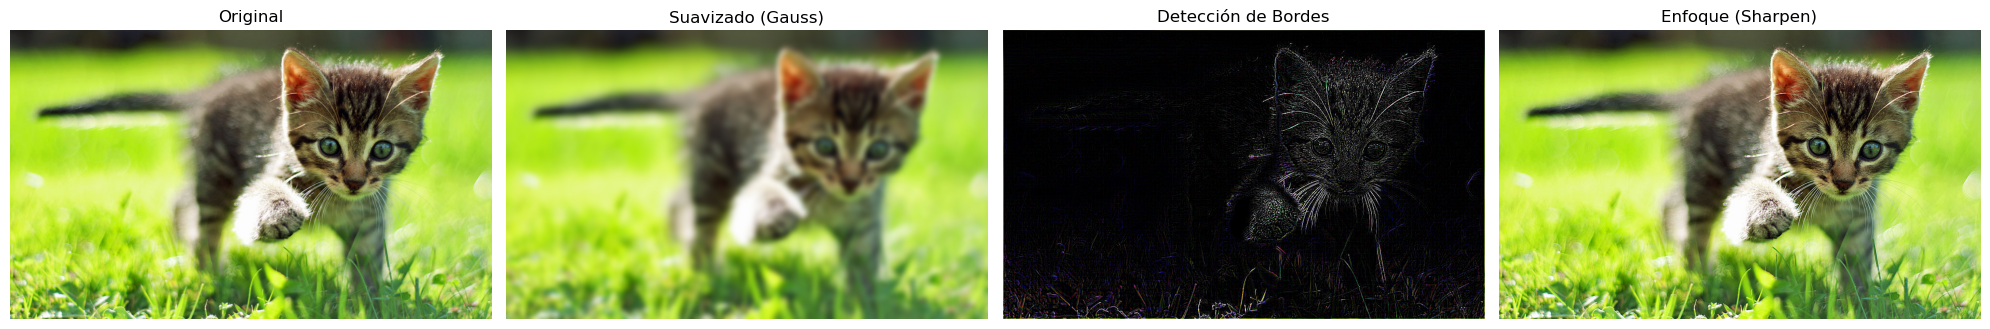

In [2]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

imagen = "C:/Users/paul.rosero/Documents/UIDE/SEMANA_1/Clase/gato.jpg"
# 1. Cargar la imagen
img = Image.open(imagen)

# --- OPERACIONES DE VECINDAD ---

# A. Suavizado (Blurring)
# Usa un kernel de promedio para "difuminar" la imagen
img_blur = img.filter(ImageFilter.BLUR)
# Para un control más fuerte, se puede usar GaussianBlur
img_gauss = img.filter(ImageFilter.GaussianBlur(radius=5))

# B. Detección de Bordes (Find Edges)
# Resalta las siluetas donde hay cambios bruscos de color
img_bordes = img.filter(ImageFilter.FIND_EDGES)

# C. Enfoque (Sharpening)
# Mejora el detalle en los bordes
img_enfoque = img.filter(ImageFilter.SHARPEN)

# --- VISUALIZACIÓN ---
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(img)
axs[0].set_title("Original")

axs[1].imshow(img_gauss)
axs[1].set_title("Suavizado (Gauss)")

axs[2].imshow(img_bordes)
axs[2].set_title("Detección de Bordes")

axs[3].imshow(img_enfoque)
axs[3].set_title("Enfoque (Sharpen)")

for ax in axs: ax.axis('off')
plt.tight_layout()
plt.show()

## CV2

### Cargar una imagen con cv2
!pip install opencv-python-headless
!pip install opencv-python==4.10.0.84

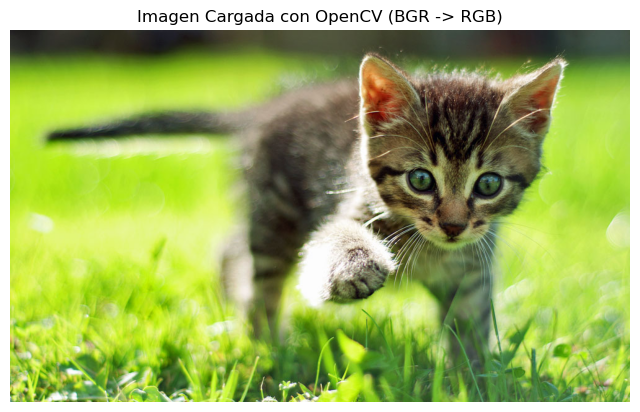

In [3]:
import cv2
import matplotlib.pyplot as plt

# Definimos la ruta que proporcionaste
ruta_archivo = "C:/Users/paul.rosero/Documents/UIDE/SEMANA_1/Clase/gato.jpg"

try:
    # 1. Cargar la imagen con OpenCV
    # Por defecto, cv2.imread carga la imagen en formato BGR
    img_bgr = cv2.imread(ruta_archivo)

    # Verificamos si la imagen cargó correctamente
    if img_bgr is None:
        raise FileNotFoundError

    # 2. CONVERSIÓN CRÍTICA: De BGR a RGB
    # Esto es necesario para que Matplotlib muestre los colores reales
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # 3. Mostrar la imagen con Matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    
    # 4. Configurar la visualización
    plt.title("Imagen Cargada con OpenCV (BGR -> RGB)")
    plt.axis('off')  # Oculta los ejes
    plt.show()

except FileNotFoundError:
    print(f"Error: No se encontró el archivo en: {ruta_archivo}")
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")

### Operaciones geométricas con imágenes

Dimensiones: 1000px de ancho x 600px de alto
Canales de color: 3


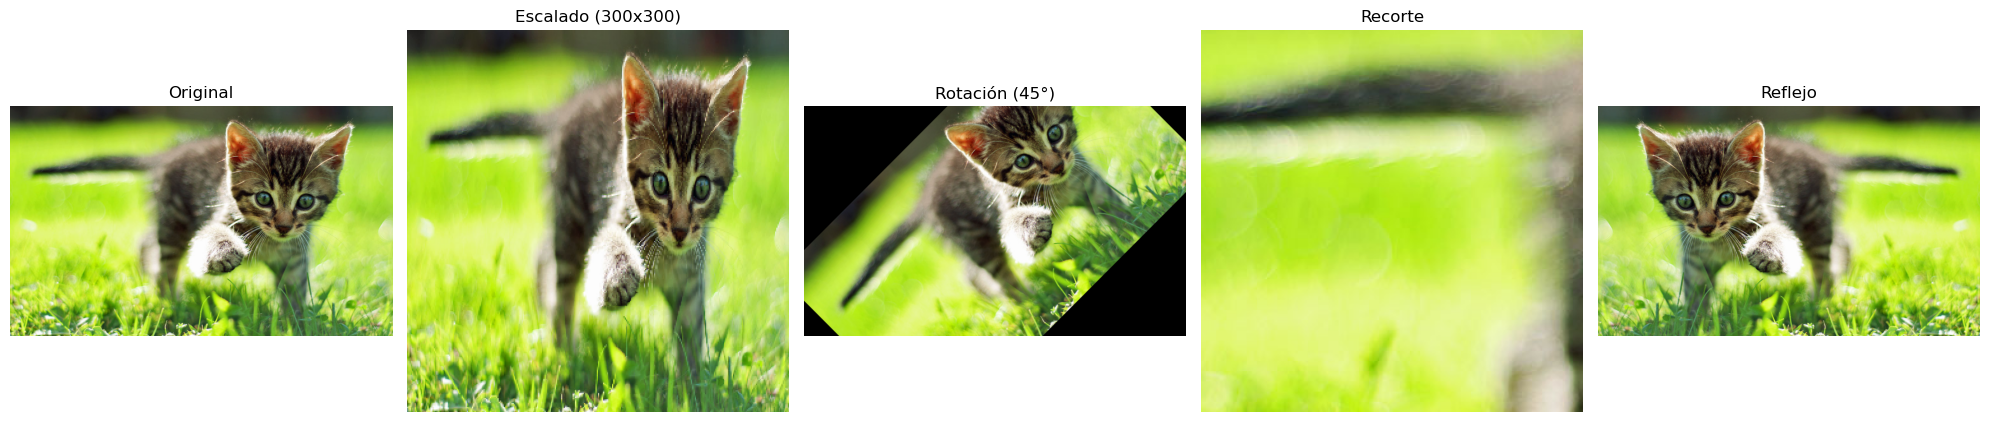

In [5]:
import cv2
import matplotlib.pyplot as plt

# Ruta de la imagen
ruta_archivo = "C:/Users/paul.rosero/Documents/UIDE/SEMANA_1/Clase/gato.jpg"

# 1. Cargar la imagen con OpenCV
img_bgr = cv2.imread(ruta_archivo)

if img_bgr is None:
    print(f"Error: No se encontró la imagen en {ruta_archivo}")
else:
    # Obtener información (alto, ancho, canales)
    alto, ancho, canales = img_bgr.shape
    print(f"Dimensiones: {ancho}px de ancho x {alto}px de alto")
    print(f"Canales de color: {canales}")

    # CONVERSIÓN PARA VISUALIZAR EN PLT: De BGR a RGB
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # A. ESCALADO (Resizing)
    # OpenCV usa (ancho, alto)
    img_resizada = cv2.resize(img_rgb, (300, 300))

    # B. ROTACIÓN
    # 1. Obtener matriz de rotación: centro, ángulo, escala
    centro = (ancho // 2, alto // 2)
    matriz = cv2.getRotationMatrix2D(centro, 45, 1.0)
    # 2. Aplicar la transformación
    img_rotada = cv2.warpAffine(img_rgb, matriz, (ancho, alto))

    # C. RECORTE (Cropping)
    # Slicing de matriz: img[y_inicio:y_fin, x_inicio:x_fin]
    img_recortada = img_rgb[100:400, 100:400]

    # D. REFLEJO (Flip)
    # 1 para horizontal, 0 para vertical, -1 para ambos
    img_reflejada = cv2.flip(img_rgb, 1)

    # --- VISUALIZACIÓN ---
    fig, axs = plt.subplots(1, 5, figsize=(20, 5))

    axs[0].imshow(img_rgb); axs[0].set_title("Original")
    axs[1].imshow(img_resizada); axs[1].set_title("Escalado (300x300)")
    axs[2].imshow(img_rotada); axs[2].set_title("Rotación (45°)")
    axs[3].imshow(img_recortada); axs[3].set_title("Recorte")
    axs[4].imshow(img_reflejada); axs[4].set_title("Reflejo")

    for ax in axs: ax.axis('off')
    plt.tight_layout()
    plt.show()

### Operaciones de punto

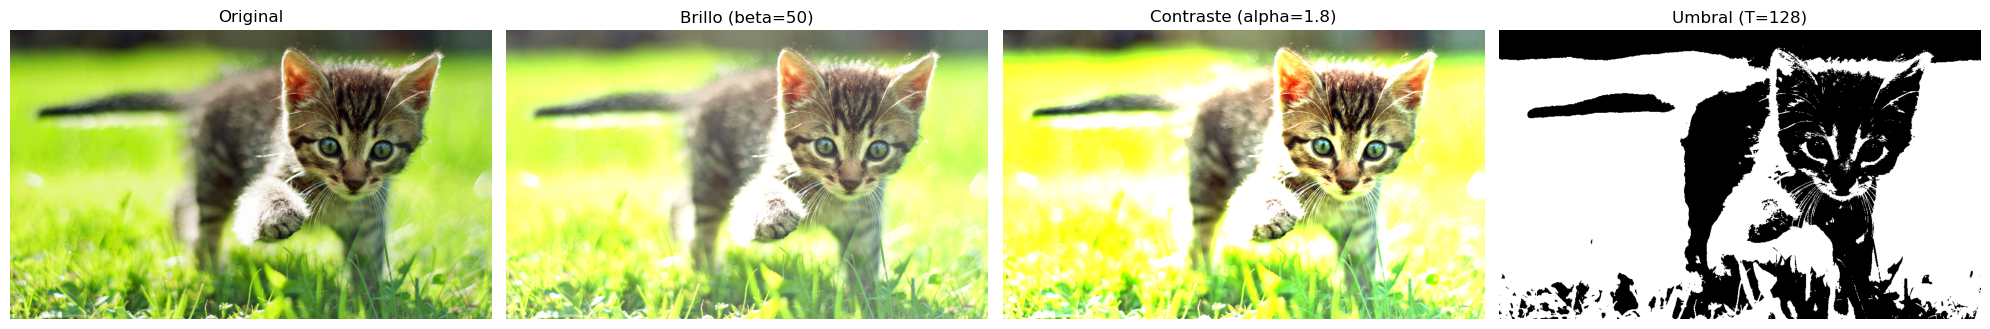

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ruta de la imagen
ruta_archivo = "C:/Users/paul.rosero/Documents/UIDE/SEMANA_1/Clase/gato.jpg"

# 1. Cargar la imagen
img_bgr = cv2.imread(ruta_archivo)

if img_bgr is None:
    print(f"Error: No se encontró la imagen en {ruta_archivo}")
else:
    # Convertir a RGB para visualización en plt
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # --- OPERACIONES DE PUNTO ---

    # A. Ajuste de Brillo
    # cv2.convertScaleAbs(img, alpha, beta) -> alpha es contraste, beta es brillo
    # Para solo brillo, dejamos alpha=1 y sumamos beta=50
    img_brillo = cv2.convertScaleAbs(img_rgb, alpha=1.0, beta=50)

    # B. Ajuste de Contraste
    # Multiplicamos por alpha (ej. 1.8 para aumentar 80%)
    img_contraste = cv2.convertScaleAbs(img_rgb, alpha=1.8, beta=0)

    # C. Umbralización (Thresholding)
    # 1. Convertir a gris
    img_gris = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    # 2. Aplicar umbral: cv2.threshold(imagen, valor_umbral, valor_max, tipo)
    _, img_umbral = cv2.threshold(img_gris, 128, 255, cv2.THRESH_BINARY)

    # --- VISUALIZACIÓN ---
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    axs[0].imshow(img_rgb)
    axs[0].set_title("Original")

    axs[1].imshow(img_brillo)
    axs[1].set_title("Brillo (beta=50)")

    axs[2].imshow(img_contraste)
    axs[2].set_title("Contraste (alpha=1.8)")

    axs[3].imshow(img_umbral, cmap='gray')
    axs[3].set_title("Umbral (T=128)")

    for ax in axs: ax.axis('off')
    plt.tight_layout()
    plt.show()

### Operaciones de vecindad

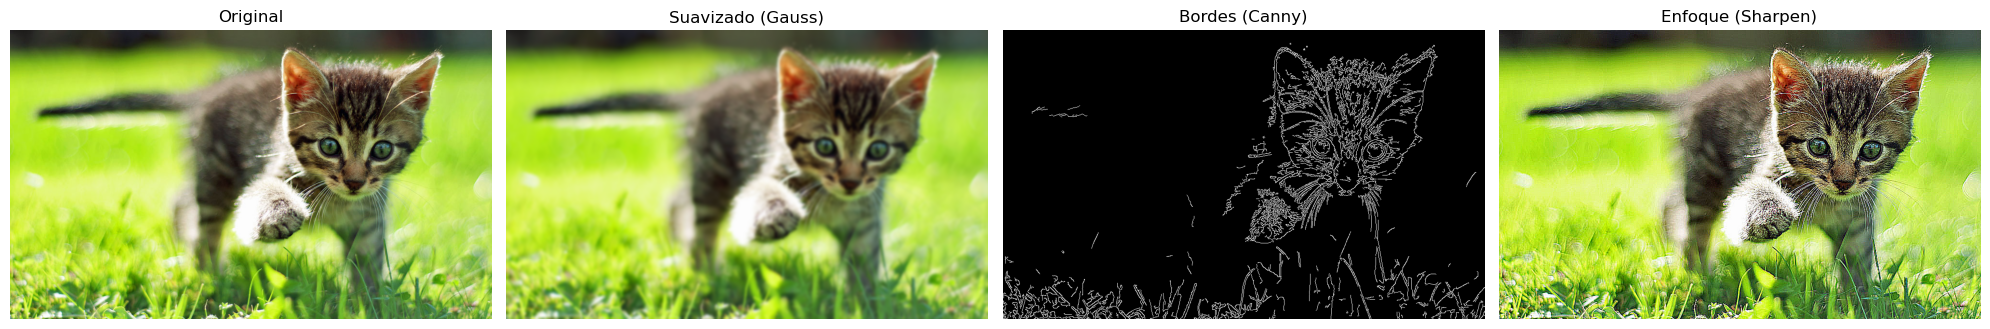

In [7]:
import cv2
import matplotlib.pyplot as plt

# Ruta de la imagen
ruta_archivo = "C:/Users/paul.rosero/Documents/UIDE/SEMANA_1/Clase/gato.jpg"

# 1. Cargar la imagen
img_bgr = cv2.imread(ruta_archivo)

if img_bgr is None:
    print(f"Error: No se encontró la imagen en {ruta_archivo}")
else:
    # Convertir a RGB para visualización correcta en Matplotlib
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # --- OPERACIONES DE VECINDAD (FILTROS) ---

    # A. Suavizado (Gaussian Blur)
    # (15, 15) es el tamaño del kernel (debe ser impar). A mayor número, más borroso.
    img_gauss = cv2.GaussianBlur(img_rgb, (15, 15), 0)

    # B. Detección de Bordes (Canny)
    # Canny es más avanzado que FIND_EDGES. 100 y 200 son los umbrales de detección.
    # Convertimos primero a gris para una mejor detección de bordes
    img_gris = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    img_bordes = cv2.Canny(img_gris, 100, 200)

    # C. Enfoque (Sharpening)
    # OpenCV no tiene un "Sharpen" directo, se usa un kernel personalizado
    kernel_sharpen = np.array([[-1, -1, -1], 
                               [-1,  9, -1], 
                               [-1, -1, -1]])
    img_enfoque = cv2.filter2D(img_rgb, -1, kernel_sharpen)

    # --- VISUALIZACIÓN ---
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    axs[0].imshow(img_rgb)
    axs[0].set_title("Original")

    axs[1].imshow(img_gauss)
    axs[1].set_title("Suavizado (Gauss)")

    # Usamos cmap='gray' porque Canny devuelve una imagen de un solo canal
    axs[2].imshow(img_bordes, cmap='gray')
    axs[2].set_title("Bordes (Canny)")

    axs[3].imshow(img_enfoque)
    axs[3].set_title("Enfoque (Sharpen)")

    for ax in axs: ax.axis('off')
    plt.tight_layout()
    plt.show()

### Usar la cámara

In [1]:
import cv2

# 1. Inicializar la cámara (0 es la cámara por defecto)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: No se pudo acceder a la cámara.")
else:
    print("Cámara abierta. Presiona 's' para guardar una foto o 'q' para salir.")

    while True:
        # 2. Leer un frame de la cámara
        ret, frame = cap.read()

        if not ret:
            print("Error al capturar el video.")
            break

        # 3. Mostrar el video en vivo en una ventana
        cv2.imshow('Presiona S para tomar foto', frame)

        # 4. Escuchar el teclado
        key = cv2.waitKey(1) & 0xFF

        if key == ord('s'):  # Si presiona 's', guarda la imagen
            nombre_foto = "foto_capturada.jpg"
            cv2.imwrite(nombre_foto, frame)
            print(f"¡Foto guardada como {nombre_foto}!")
            break
        
        elif key == ord('q'):  # Si presiona 'q', sale sin guardar
            break

    # 5. Liberar la cámara y cerrar ventanas
    cap.release()
    cv2.destroyAllWindows()

Cámara abierta. Presiona 's' para guardar una foto o 'q' para salir.
¡Foto guardada como foto_capturada.jpg!
